In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Sahm Recession Indicator

<u>Sahm Rule statement [[src]](https://en.wikipedia.org/wiki/Sahm_rule#See_also)</u>

<i>When the three-month moving average of the national unemployment rate is 0.5 percentage point or more above its low over the prior twelve months, we are in the early months of recession.</i>

In this notebook I will use the term 'Sahm indicator' to refer to this value:
- the three-month moving average of national unemployment minus the twelve month moving average of national unemployment

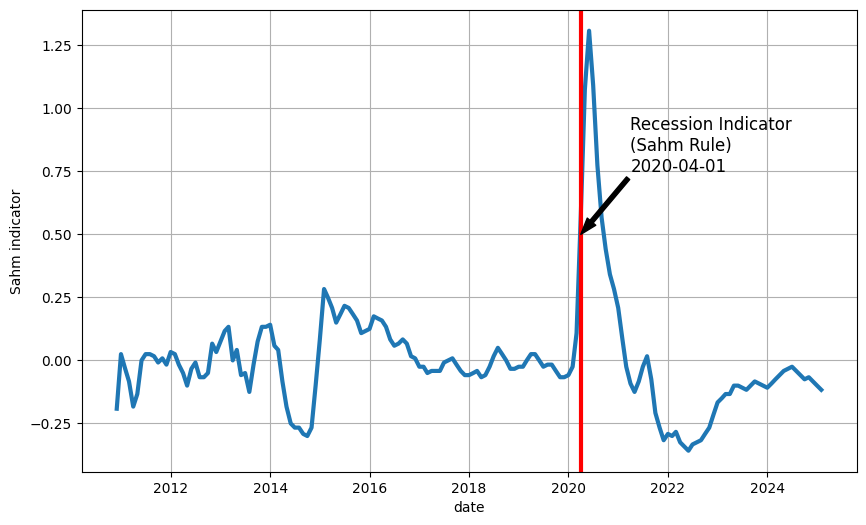

In [9]:
url = 'https://storage.dosm.gov.my/labour/lfs_month.parquet'
labour_force_df = pd.read_parquet(url)
labour_force_df['date'] = pd.to_datetime(labour_force_df['date'])
labour_force_df = labour_force_df.set_index('date')


quarterly_moving_average = labour_force_df.rolling(3).mean().reset_index()
annual_moving_average = labour_force_df.rolling(12).mean().reset_index()
sahm_df = (quarterly_moving_average.iloc[:, 1:] - annual_moving_average.iloc[:, 1:]).assign(**{'date': quarterly_moving_average['date']})

recession_start_date = sahm_df[sahm_df['u_rate'] >= 0.5].iloc[0, 7]

plt.figure(figsize=(10, 6))
sns.lineplot(sahm_df, x='date', y='u_rate', linewidth=3)
plt.ylabel('Sahm indicator')
plt.axvline(recession_start_date, linewidth=3, color='red')
plt.annotate(
    text=f'Recession Indicator\n(Sahm Rule)\n{recession_start_date.strftime("%Y-%m-%d")}',
    xy=(recession_start_date, 0.5),
    xytext=(recession_start_date + pd.to_timedelta('365d'), 0.75),
    arrowprops={'width': 3, 'headwidth': 8, 'color': 'black'},
    fontsize='large'
)
plt.grid(True);